# Flight Price Prediction

### Overview

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

* Size of training set: 10683 records 
* Size of test set: 2671 records 

#### FEATURES: 

* **Airline:** The name of the airline. 
* **Date_of_Journey:** The date of the journey 
* **Source:** The source from which the service begins. 
* **Destination:** The destination where the service ends. 
* **Route:** The route taken by the flight to reach the destination. 
* **Dep_Time:** The time when the journey starts from the source. 
* **Arrival_Time:** Time of arrival at the destination. 
* **Duration:** Total duration of the flight. 
* **Total_Stops:** Total stops between the source and destination. 
* **Additional_Info:** Additional information about the flight 
* **Price:** The price of the ticket

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing the Train and Test data

In [2]:
train_df = pd.read_excel("./Data/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
test_df = pd.read_excel("./Data/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

#### Exploratory Data Analysis

* What Airlines do we have and what are the flight counts given to us?

*Train Data*

In [3]:
train_df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

*Test Data*

In [4]:
test_df.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

* What is number of Rows and Columns in the Train and Test sets?

In [5]:
print("The shape of the train set is:", train_df.shape)
print("The shape of the test set is:", test_df.shape)

The shape of the train set is: (10683, 11)
The shape of the test set is: (2671, 10)


In [6]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Feature Engineering

Identifying and handling Outliers

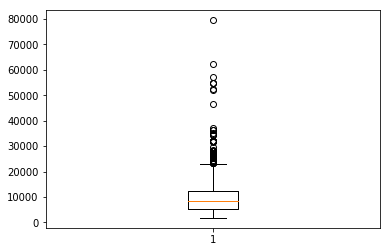

In [7]:
plt.boxplot(train_df["Price"])
plt.show()

* There are some Flight Price above 40000. These could be potential outliers. Let's explore a little more on this.

In [8]:
train_df[train_df["Price"]>40000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [9]:
pd.DataFrame(train_df["Price"]).skew()

Price    1.812552
dtype: float64

In [10]:
pd.DataFrame(np.log(train_df["Price"])).skew()

Price   -0.254737
dtype: float64

In [11]:
from sklearn import model_selection

*Removing the outliers*

In [16]:
train_df = train_df[train_df["Price"]<40000].reset_index()
train_df.drop("index", axis=1, inplace=True)

*Normalizing the Target variable*

In [17]:
train_df["Price"] = np.log10(train_df["Price"])

In [18]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3.590730
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,3.884342
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,4.142452
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,3.793651
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,4.123917


*Airlines with counts less than 100. For now we will call them as Rare*

In [19]:
temp = train_df.loc[train_df["Airline"].value_counts()[train_df["Airline"]].values > 100]["Airline"].value_counts().index

In [20]:
for i in temp:
    train_df.loc[train_df["Airline"]!=i, "Airline"] = "Rare"
    test_df.loc[test_df["Airline"]!=i, "Airline"] = "Rare"

In [21]:
train_df["Airline"].value_counts()

Rare    10674
Name: Airline, dtype: int64

*Data Cleansing on Total Stops Column*

In [22]:
train_df["Total_Stops"].value_counts()

1 stop      5618
non-stop    3491
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
# Replace non-stop with 0

train_df.loc[train_df["Total_Stops"]=="non-stop", "Total_Stops"]='0'
test_df.loc[test_df["Total_Stops"]=="non-stop", "Total_Stops"]='0'

In [24]:
# Fill the missing values in Total Stops as 0
train_df["Total_Stops"].fillna('0', inplace=True)

# Extract Numeric information from Total Stop
train_df["Total_Stops"] = train_df["Total_Stops"].str.split(" ", expand=True)[0].astype("int8")

train_df.loc[train_df["Total_Stops"] > 2, "Total_Stops"]=1000


# Perfroming the same transformations on the Test set

test_df["Total_Stops"].fillna('0', inplace=True)
test_df["Total_Stops"] = test_df["Total_Stops"].str.split(" ", expand=True)[0].astype("int8")
test_df.loc[test_df["Total_Stops"] > 2, "Total_Stops"]=1000

In [25]:
# Data Cleansing on the Arrival Time and Departure Time variables

train_df["Arrival_Time"] = train_df["Arrival_Time"].str.split(" ", expand=True)[0]
train_df["Arrival_Time"] = train_df["Arrival_Time"].str.replace(":","").astype("int32")
train_df["Dep_Time"] = train_df["Dep_Time"].str.replace(":","").astype("int32")

test_df["Arrival_Time"] = test_df["Arrival_Time"].str.split(" ", expand=True)[0]
test_df["Arrival_Time"] = test_df["Arrival_Time"].str.replace(":","").astype("int32")
test_df["Dep_Time"] = test_df["Dep_Time"].str.replace(":","").astype("int32")

In [26]:
# Data Cleansing on the Duration Variable to convert it from Hours to Minutes

train_df["Duration"] = train_df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

test_df["Duration"] = test_df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [27]:
# Removing the Additional Information column

train_df.drop("Additional_Info", axis=1, inplace=True)
test_df.drop("Additional_Info", axis=1, inplace=True)

In [28]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Rare,24/03/2019,Banglore,New Delhi,BLR → DEL,2220,110,170,0,3.590730
1,Rare,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,1315,445,2,3.884342
2,Rare,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,925,425,1140,2,4.142452
3,Rare,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1805,2330,325,1,3.793651
4,Rare,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1650,2135,285,1,4.123917


##### Handling Date Column

In [29]:
train_df["Date_of_Journey"] = pd.to_datetime(train_df["Date_of_Journey"])

test_df["Date_of_Journey"] = pd.to_datetime(test_df["Date_of_Journey"])

In [30]:
# Extract Month and Week information

train_df["Month_of_Journey"] = train_df["Date_of_Journey"].dt.month
train_df["Week_of_Journey"] = train_df["Date_of_Journey"].dt.week

test_df["Month_of_Journey"] = test_df["Date_of_Journey"].dt.month
test_df["Week_of_Journey"] = test_df["Date_of_Journey"].dt.week

In [31]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey,Week_of_Journey
0,Rare,2019-03-24,Banglore,New Delhi,BLR → DEL,2220,110,170,0,3.590730,3,12
1,Rare,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,550,1315,445,2,3.884342,1,1
2,Rare,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,925,425,1140,2,4.142452,9,36
3,Rare,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1805,2330,325,1,3.793651,12,49
4,Rare,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1650,2135,285,1,4.123917,1,1


In [32]:
train_df["Source"].value_counts()

Delhi       4535
Kolkata     2871
Banglore    2190
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
test_df["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [34]:
train_df["Destination"].value_counts()

Cochin       4535
Banglore     2871
Delhi        1265
New Delhi     925
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
test_df["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [36]:
# Destination has 2 different values Delhi and New Delhi. We need to keep a standard value

train_df.loc[train_df["Destination"]=="Delhi", "Destination"]='New Delhi'
test_df.loc[test_df["Destination"]=="Delhi", "Destination"]='New Delhi'

In [37]:
# train_df["Route"].str.split(" → ", expand=True)

In [38]:
# Dropping Route column

train_df.drop("Route", axis=1, inplace=True)

test_df.drop("Route", axis=1, inplace=True)

In [39]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey,Week_of_Journey
0,Rare,2019-03-24,Banglore,New Delhi,2220,110,170,0,3.590730,3,12
1,Rare,2019-01-05,Kolkata,Banglore,550,1315,445,2,3.884342,1,1
2,Rare,2019-09-06,Delhi,Cochin,925,425,1140,2,4.142452,9,36
3,Rare,2019-12-05,Kolkata,Banglore,1805,2330,325,1,3.793651,12,49
4,Rare,2019-01-03,Banglore,New Delhi,1650,2135,285,1,4.123917,1,1


In [40]:
# Dropping Date of Journey column

train_df.drop("Date_of_Journey", axis=1, inplace=True)

test_df.drop("Date_of_Journey", axis=1, inplace=True)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10674 entries, 0 to 10673
Data columns (total 10 columns):
Airline             10674 non-null object
Source              10674 non-null object
Destination         10674 non-null object
Dep_Time            10674 non-null int32
Arrival_Time        10674 non-null int32
Duration            10674 non-null int64
Total_Stops         10674 non-null int8
Price               10674 non-null float64
Month_of_Journey    10674 non-null int64
Week_of_Journey     10674 non-null int64
dtypes: float64(1), int32(2), int64(3), int8(1), object(3)
memory usage: 677.6+ KB


##### One-Hot Encoding to handle categorical data

In [42]:
train_df = pd.get_dummies(train_df, drop_first=True)

test_df = pd.get_dummies(test_df, drop_first=True)

In [43]:
train_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month_of_Journey,Week_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2220,110,170,0,3.590730,3,12,0,0,0,0,0,0,0,1
1,550,1315,445,2,3.884342,1,1,0,0,1,0,0,0,0,0
2,925,425,1140,2,4.142452,9,36,0,1,0,0,1,0,0,0
3,1805,2330,325,1,3.793651,12,49,0,0,1,0,0,0,0,0
4,1650,2135,285,1,4.123917,1,1,0,0,0,0,0,0,0,1


In [44]:
# Separating input features and labels to prepare for ML algorithm

y = train_df["Price"].copy()
X = train_df.drop("Price", axis=1)

In [45]:
# Feature Scaling using Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)

In [46]:
X.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Month_of_Journey,Week_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.647469,-1.828822,-0.931739,-0.403222,-0.849626,-0.779455,-0.192394,-0.859488,-0.606577,-0.264312,-0.859488,-0.264312,-0.192394,1.968241
1,-1.259004,-0.065720,-0.390390,0.736908,-1.519263,-1.640468,-0.192394,-0.859488,1.648596,-0.264312,-0.859488,-0.264312,-0.192394,-0.508068
2,-0.606353,-1.367928,0.977745,0.736908,1.159288,1.099121,-0.192394,1.163483,-0.606577,-0.264312,1.163483,-0.264312,-0.192394,-0.508068
3,0.925202,1.419383,-0.626615,0.166843,2.163744,2.116683,-0.192394,-0.859488,1.648596,-0.264312,-0.859488,-0.264312,-0.192394,-0.508068
4,0.655439,1.134067,-0.705357,0.166843,-1.519263,-1.640468,-0.192394,-0.859488,-0.606577,-0.264312,-0.859488,-0.264312,-0.192394,1.968241


In [47]:
# Keeping a separate validation set to test

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Machine Learning Models

##### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn import metrics

In [50]:
lnr_pred = lnr.predict(X_train)
lnr_rmse = np.sqrt(metrics.mean_squared_error(lnr_pred, y_train))
# lnr_r2_score = metrics.adjusted_rand_score(lnr_pred, y_train)

lnr_rmse
# lnr_r2_score

0.16266703951954936

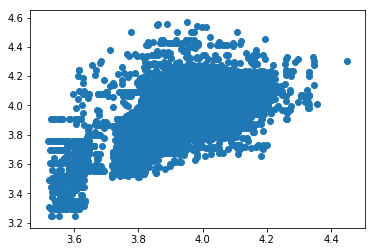

In [51]:
plt.scatter(lnr_pred, y_train)
plt.show()

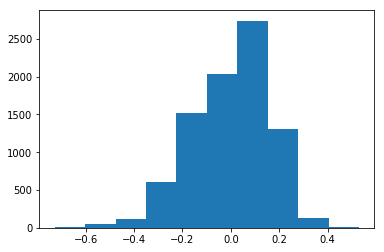

In [52]:
plt.hist(lnr_pred-y_train)
plt.show()

*Applying Cross-validation to test if the model is Overfitting*

In [53]:
from sklearn.model_selection import cross_val_score

lnr_cv_scores = cross_val_score(lnr, X, y, scoring="neg_mean_squared_error", cv=5)
lnr_cv_rmse = np.sqrt(-lnr_cv_scores)
lnr_cv_rmse

array([0.16095809, 0.16066436, 0.16132578, 0.16617536, 0.1610125 ])

*Predicting on the Validation Set*

In [54]:
lnr_pred_val = lnr.predict(X_val)
lnr_rmse_val = np.sqrt(metrics.mean_squared_error(lnr_pred_val, y_val))
# lnr_r2_score = metrics.adjusted_rand_score(lnr_pred, y_train)

lnr_rmse_val
# lnr_r2_score

0.15789272987844358

*Predicting on the Test Set*

In [55]:
test_df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Month_of_Journey,Week_of_Journey,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.782716,-1.365130,0.030389,0.161544,0.129089,0.064183,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.273586,-0.169972,-0.512140
1,-1.170745,-0.517334,-0.796151,0.161544,2.101227,2.059379,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.273586,-0.169972,-0.512140
2,1.108293,0.736548,1.563970,0.161544,-0.199601,-0.089293,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.273586,-0.169972,-0.512140
3,-0.853968,1.021522,0.279347,0.161544,-0.199601,-0.089293,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.273586,-0.169972,-0.512140
4,1.882638,-1.621606,-0.935567,-0.398825,0.129089,0.294398,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,-0.273586,-0.169972,1.952591


In [56]:
test_pred = lnr.predict(test_df)

In [57]:
# final_pred = round(pd.DataFrame(np.exp(test_pred), columns=["Price"]),1)
final_pred = round(pd.DataFrame(10**test_pred, columns=["Price"]),1)
final_pred[final_pred["Price"]<0]

,Price


In [58]:
final_pred.to_excel("submission.xlsx", index=False )

In [59]:
1 - np.sqrt(np.square(np.log10(lnr_pred +1) - np.log10(y_train +1)).mean())

0.9856280331776386

#### Regularization Ridge and Lasso

In [60]:
from sklearn.linear_model import Ridge, Lasso

In [61]:
alpha = [-100, -50, -30, -10, 0, 10, 30, 50, 100]

##### Ridge Regularization

In [62]:
for i in alpha:
    rgr = Ridge(alpha=i)
    rgr.fit(X_train, y_train)
    rgr_pred = rgr.predict(X_train)
    rgr_rmse = np.sqrt(metrics.mean_squared_error(rgr_pred, y_train))
    # lnr_r2_score = metrics.adjusted_rand_score(lnr_pred, y_train)
    print(i, rgr_rmse)

-100 0.16995027129994678
-50 0.21033069462822393
-30 0.19316643469841324
-10 0.16300663960960227
0 0.16434579421891843
10 0.16278505301883164
30 0.1632002254371621
50 0.16355495578818768
100 0.1641197401254374


##### Lasso Regularization

In [63]:
for i in alpha:
    lsr = Lasso(alpha=i)
    lsr.fit(X_train, y_train)
    lsr_pred = lsr.predict(X_train)
    lsr_rmse = np.sqrt(metrics.mean_squared_error(lsr_pred, y_train))
    # lnr_r2_score = metrics.adjusted_rand_score(lnr_pred, y_train)
    print(i,lsr_rmse)

-100 2121.4484569373085
-50 1060.7242362583756
-30 636.4345538074979
-10 212.1449022363464


C:\Users\pmaht\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pmaht\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


0 0.16266703955026296
10 0.22162719102827283
30 0.22162719102827283
50 0.22162719102827283
100 0.22162719102827283


C:\Users\pmaht\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.97338549544182, tolerance: 0.04194238261865218
  positive)


* There isn't any improvement from the Linear Model

#### Random Forest

In [64]:
train_df = pd.read_excel("./Data/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

In [65]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_pred = rfr.predict(X_train)
rfr_rmse = np.sqrt(metrics.mean_squared_error(rfr_pred, y_train))
# lnr_r2_score = metrics.adjusted_rand_score(lnr_pred, y_train)

rfr_rmse

0.0615579584132061

In [66]:
rfr_cv_scores = cross_val_score(rfr, X, y, scoring="neg_mean_squared_error", cv=5)
rfr_cv_rmse = np.sqrt(-rfr_cv_scores)
rfr_cv_rmse

array([0.10325617, 0.09944467, 0.10251193, 0.10947914, 0.10846178])

In [68]:
1 - np.sqrt(np.square(np.log10(rfr_pred +1) - np.log10(y_train +1)).mean())

0.994546757405704

In [69]:
test_pred = lnr.predict(test_df)
# final_pred = round(pd.DataFrame(np.exp(test_pred), columns=["Price"]),1)
final_pred = round(pd.DataFrame(10**test_pred, columns=["Price"]),1)
final_pred[final_pred["Price"]<0]

,Price


In [70]:
final_pred.to_excel("submission.xlsx", index=False )

# Conclusion

* We performed an analysis on the input as well as the output feature to understand the data and also to decide if any transformations are required on any of them.
* Feature Engineering steps included - 
    * Idenfication and Removal of Outliers
    * Handling Missing Data
    * Data Cleansing
    * Handling Date Column
    * Feature Extraction
    * Normalization and Standardization
* We applied Linear Regression model along with Regularization techniques - Ridge and Lasso to see if there was any overfitting.
* We also used Random Forest and observed that it outperformed Linear Regression